<a href="https://colab.research.google.com/github/suckgitariuses/Machine_Learning/blob/main/JS11_Klasifikasi2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Adinda Mirza Devani**

**TI-3B/04**

**2341720046**

**Klasifikasi 2**

**Langkah 1 - Import Library**

In [1]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

**Langkah 2 - Memuat Data Dummy**

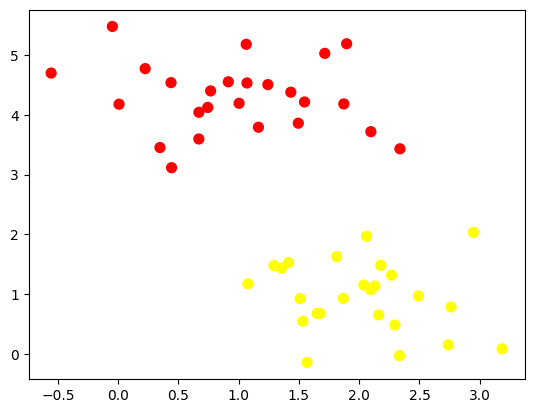

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

**Langkah 3 - Buat Ilustrasi Garis pemisah**

**Langkah 4 - Ilustrasi Margin**

margin dalam satu garis juga dapat digunakan untuk memperjelas posisi sebuah data terhadap label.

(-1.0, 3.5)

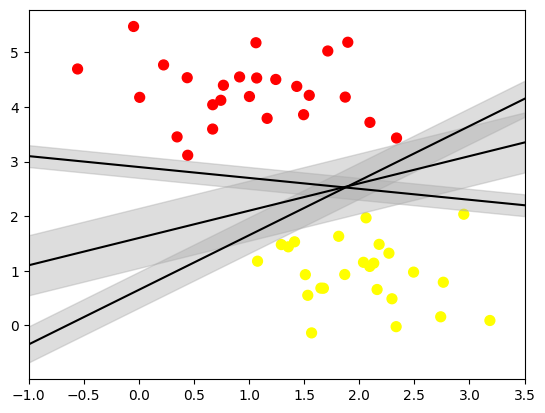

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

**Langkah 5 - Fitting Model**

selanjutnya, kita akan melakukan pelatihan terhadap model SVM. model kali ini akan menggunakan fungsi (kernel) dengan jenis linier.

In [4]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

selanjutnya buat fungsi untuk membantu visualisasi hasil fit model.

In [5]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

lakukan plotting dengan fungsi yang telah dibuat.

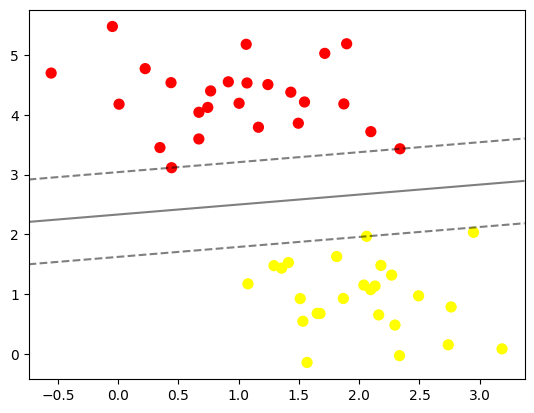

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

beberapa tiitk data yang menyentuh garis disebut dengan support vector. unntuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil suport_vectors_.

Hasil fitting merupakan kunci keberhasilan suatu classifier (yang hanya dilihat dari posisi dari support vector). Data-data lain yang berada jauh dari margin dan tetap berada di area yang tepat tidak memiliki kemampuan untuk memodifikasi fitting (karena bukan support vector). Data-data tersebut tidak berkontribusi terhadap loss function yang digunakan untuk fitting model. Untuk lebih memahami hal ini, 60 dan 120 data awal digunakan sebagai contoh dalam bentuk perbandingan.

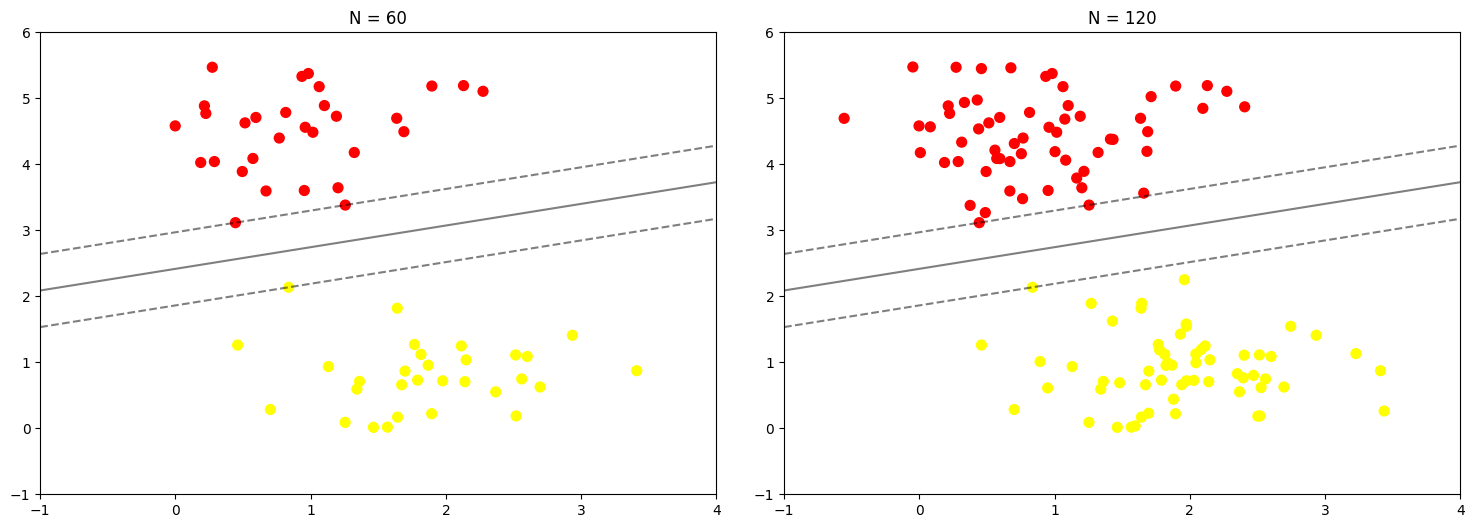

In [7]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

berdasarkan hasil di atas, perubahan jumlah data tidak mempengaruhi model yang digunakan. ilustrasi lebih jelas dapat dilihat pada diagram di bawah ini.

In [9]:
!pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 62.1 MB/s eta 0:00:00


In [10]:
# jumlah data dapat dipilih di antara 10 atau 200 buah data, telihat tidak ada perubahan pada model

from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

<function __main__.plot_svm(N=10, ax=None)>

**Praktikum 2**

**Klasifikasi SVM dengan data Dummy Non-Linier**

**Langkah 1 - Ilustrasi Data Non-Linier**

**Langkah 1a - Import Library**

In [11]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC

**Langkah 1b - Buat Kembali Fungsi Plotting**

In [107]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

**Langkah 1c - Buat Data Dummy Non-Linier**

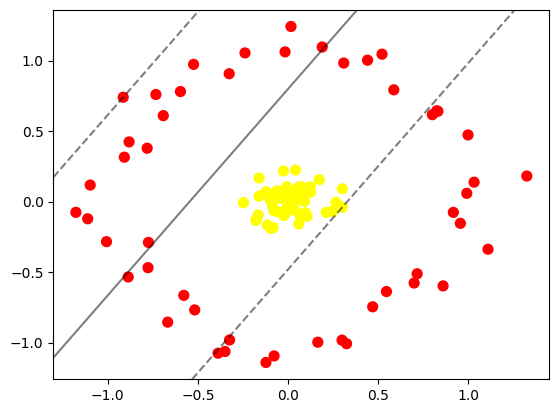

In [620]:
# contoh data tidak terpisah secara linier
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

Berdasarkan contoh data di atas, tidak ditemukan sebuah garis pemisah linier yang mampu berperan sebagai pemisah data. Oleh karena itu, proyeksi (sudut pandang) lain terhadap data diperlukan supaya data dapat terpisahkan dengan jelas. Pada kegiatan ini, proyeksi yang digunakan adalah proyeksi berbasis radial.

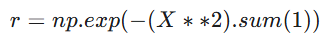

Karena proyeksi radial tidak cukup menggunakan model 2D, maka plot visualisasi diubah menjadi model 3D.




In [622]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed
import numpy as np

# Contoh data dummy
X = np.random.rand(100, 2)
y = np.random.rand(100)
r = np.random.rand(100)  # <== tambahkan variabel r

def plot_3D(elev=30, azim=30, X=X, y=y, r=r):
    fig = plt.figure()
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
    plt.show()

interact(plot_3D, elev=[-90, 45, 30, 20, 10], azim=(-180, 180),
         X=fixed(X), y=fixed(y), r=fixed(r))


interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[0.92219196, 0.37227284],
       [0.79591676, 0.13036015],
       [0.96344113, 0.39610512],
       [0.17938618, 0.42076522],
       [0.7180491 , 0.76910834],
       [0.46680221, 0.9338058 ],
       [0.71203949, 0.05464738],
       [0.44610735, 0.70659261],
       [0.90382533, 0.35309788],
       [0.73381714, 0.68456387],
       [0.89814238, 0.72874399],
       [0.74050757, 0.20598365],
       [0.89277758, 0.0300211 ],
       [0.89498872, 0.18297235],
       [0.29543222, 0.75382062],
       [0.99628116, 0.05422594],
       [0.22409102, 0.81313372],
       [0.99819276, 0.3134914 ],
       [0.44347974, 0.78316695],
       [0.34119236, 0.4901176 ],
       [0.66734788, 0.03429865],
       [0.09664693, 0.46202738],
       [0.67662699, 0.44602302],
       [0.16805004, 0.93862508],
       [0.31822003, 0.19571451],
       [0.45655279, 0.28551477],
       [0.67260218, 0.24830644],
       [0.74741012, 0.56148541],
       [0.24274974, 0.01736538],
       [0.03169079, 0.24804858],
       [0.57467517, 0.26216371],
       [0.54628776, 0.00219371],
       [0.76234069, 0.2142859 ],
       [0.65862991, 0.19696606],
       [0.53600707, 0.8817435 ],
       [0.66303397, 0.80752243],
       [0.92571279, 0.68310064],
       [0.51639414, 0.6971735 ],
       [0.03145389, 0.11023104],
       [0.00374443, 0.07034086],
       [0.18569431, 0.82469892],
       [0.49086038, 0.51555764],
       [0.8519685 , 0.17164655],
       [0.0696202 , 0.77016985],
       [0.63640455, 0.2635057 ],
       [0.08492517, 0.42585498],
       [0.26482154, 0.05636974],
       [0.42341626, 0.5627828 ],
       [0.84465185, 0.29487953],
       [0.97555266, 0.59200716],
       [0.3419015 , 0.57898454],
       [0.30510902, 0.37619615],
       [0.96439189, 0.37384691],
       [0.29192089, 0.98314823],
       [0.66875448, 0.59168027],
       [0.52336417, 0.7307293 ],
       [0.70995023, 0.43898462],
       [0.54051077, 0.21680167],
       [0.72116475, 0.6643778 ],
       [0.73750422, 0.16850484],
       [0.53995354, 0.14669253],
       [0.36841018, 0.9272763 ],
       [0.37096799, 0.11081676],
       [0.5752145 , 0.15348913],
       [0.44389651, 0.69900765],
       [0.8565018 , 0.83244421],
       [0.17626823, 0.90085137],
       [0.30741764, 0.23784063],
       [0.93339288, 0.62724906],
       [0.21113348, 0.47413162],
       [0.55539327, 0.38674012],
       [0.03822122, 0.79816835],
       [0.91663775, 0.10192744],
       [0.20945325, 0.00873698],
       [0.62146512, 0.88892514],
       [0.66397956, 0.10452817],
       [0.5848446 , 0.71591935],
       [0.22158935, 0.38363669],
       [0.16574083, 0.29341205],
       [0.31333991, 0.93960705],
       [0.38040617, 0.81444033],
       [0.7965062 , 0.96134262],
       [0.11049166, 0.3607642 ],
       [0.05273492, 0.73306871],
       [0.00140561, 0.28365206],
       [0.11925654, 0.26824676],
       [0.77481732, 0.24389553],
       [0.30540625, 0.23017065],
       [0.9073631 , 0.53734661],
       [0.0326745 , 0.99132694],
       [0.63447198, 0.55393079],
       [0.01504281, 0.27531008],
       [0.04476135, 0.1893899 ],
       [0.62168186, 0.37088096],
       [0.37907998, 0.55345143],
       [0.33765155, 0.72571308],
       [0.60175813, 0.32808736],
       [0.14758292, 0.5075098 ],
       [0.05187116, 0.84454253],
       [0.48127292, 0.0868315 ]]), y=array([0.17109322, 0.80142097, 0.7020314 , 0.97868049, 0.49415768,
       0.70748892, 0.96964698, 0.63827844, 0.53610123, 0.80627256,
       0.48512861, 0.98609508, 0.16267245, 0.88000235, 0.39071006,
       0.77016274, 0.29921337, 0.39510126, 0.4557    , 0.06576216,
       0.88436019, 0.36161342, 0.71487785, 0.32988233, 0.66726216,
       0.23544083, 0.66557393, 0.70176832, 0.6315123 , 0.80488524,
       0.61576465, 0.19028013, 0.53854469, 0.29127927, 0.87668178,
       0.99588933, 0.44919787, 0.21521883, 0.36643147, 0.90215015,
       0.49233841, 0.18547687, 0.99119019, 0.141787  , 0.28728052,
       0.28454861, 0.16602129, 0.23736692, 0.3

**Langkah 2 - Fitting Model**

In [624]:
import numpy as np
from sklearn.svm import SVC

# Misal y masih berupa nilai kontinu
# Kita ubah ke label 0 dan 1 pakai threshold (contoh: nilai median)
y_class = np.where(y > np.median(y), 1, 0)

# Buat model klasifikasi SVM
clf = SVC(kernel='rbf', C=1e6)
clf.fit(X, y_class)


SVC(C=1000000.0)

plot hasil decision boundaries dari kernel RBF

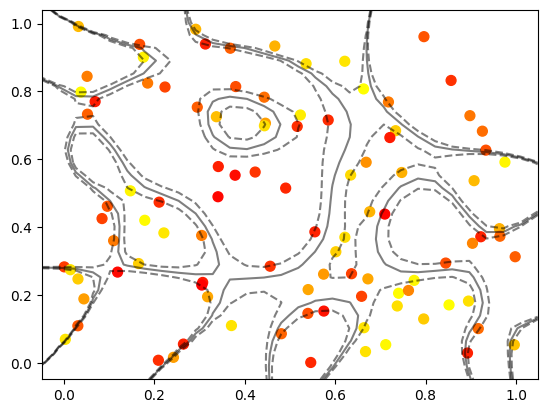

In [625]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

**Praktikum 3**

**SVM Data Overlapping**

**Langkah 1 - Import Library dan Buat Fungsi Plotting**

In [626]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

In [627]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

**Langkah 2 - Buat Data Dummy**

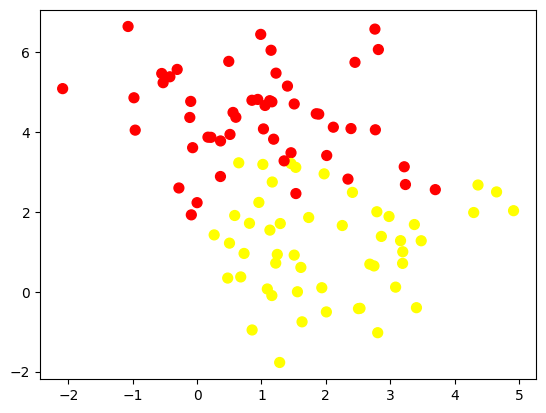

In [628]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

**Langkah 3 - Analisis Dampak Tunning**

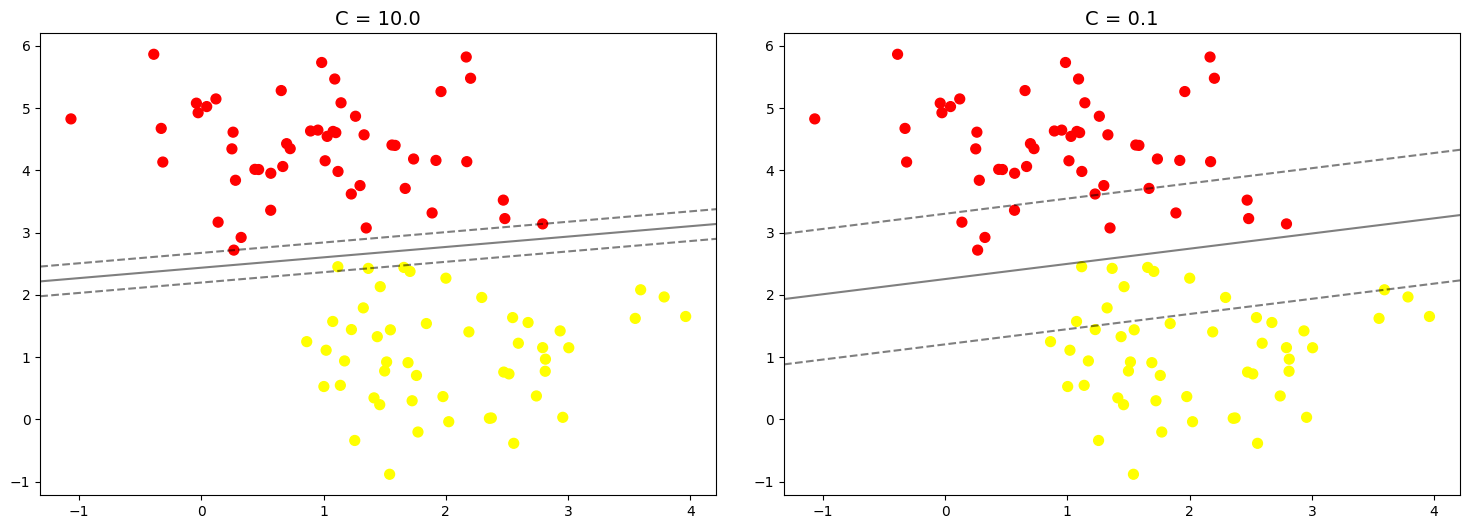

In [629]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

**Praktikum 4**

**Klasifikasi Citra Wajah**

**Langkah 0 - Unduh Dataset**

In [630]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


**Langkah 1 - Inspeksi Citra Wajah**

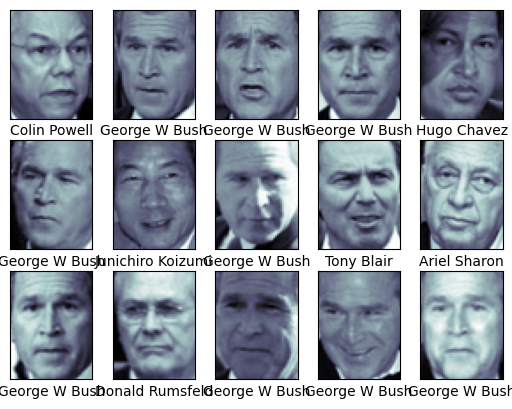

In [631]:
# contoh wajah yang digunakan
from matplotlib import pyplot as plt

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

**Langkah 2 - Pra Pengolahan Data**

Pada tahap ini, kita akan mencoba melakukan proses pra pengolahan data sederhana dengan menggunakan Principal Component Analysis (PCA). PCA akan memproyeksikan fitur dengan rosolusi tinggi (banyak dimensi) ke dalam principal component atau fitur yang dianggap penting saja. Metode PCA sering juga disebut sebagai metode reduksi dimensi.

In [632]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')

# Pipeline digunakan untuk melakukan proses secara bertahap dalam
# 1 eksekusi fungsi secara langsung
model = make_pipeline(pca, svc)

**Langkah 3 - Split Data**

In [633]:
# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

**Langkah 4 - Pembuatan Model + Tunning**

Pada langkah ini, kita akan mensimulasikan pembuatan model dan hyperparameter tunning secara langsung untuk mendapatkan nilai hyperparameter yang terbaik. Nilai tersebut dapat dicapai salah satunya dengan menggunakan teknik GridSearch. GridSearch akan mencoba menjadi kombinasi hyperparameter terbaik dengan cara melakukan pengujian performansinya satu per satu. Cara ini mudah akan tetapi memakan waktu yang lama dan komputasi yang cukup tinggi.

In [634]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: user 1min 59s, sys: 110 ms, total: 1min 59s
Wall time: 1min 11s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


gunakan model terbaik untuk proses prediksi

In [635]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

**Langkah 5 - Cek Hasil Prediksi**

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

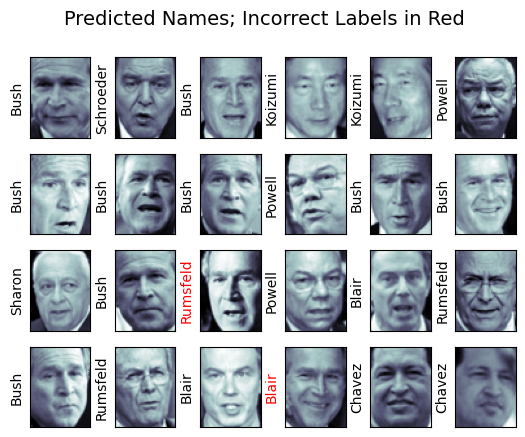

In [636]:
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

**Langkah 6 - Cek Performansi**

Pertama, cek performansi dengan classification_report dari sklearn.

In [637]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



Dari tabel tersebut, kita mendapatkan informasi terkait dengan akurasi keseluruhan, presisi, recall, dan f1-score untuk setiap label.

Selanjutnya, kita dapat menggunakan confusion matrix untuk mengetahui label label yang terklasifikasi  dengan benar dan tidak.

Text(113.92222222222219, 0.5, 'predicted label')

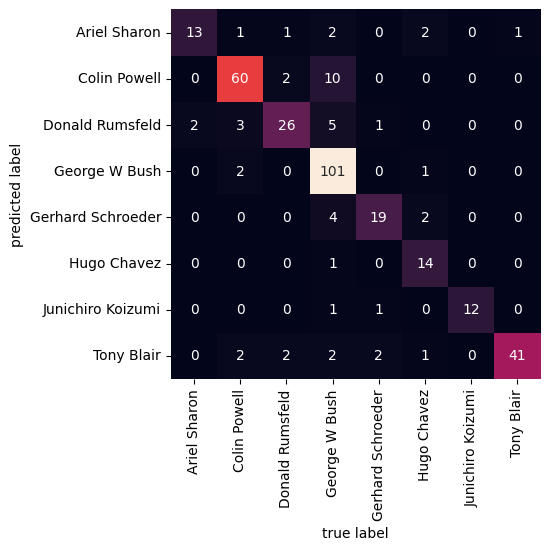

In [638]:
# bentuk confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

**Praktikum 5 - Klasifikasi Citra Siang dan Malam**

In [644]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**Langkah 0 - Import Library**

In [639]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

Lakukan ekstraksi data gambar, kemudian definisikan lokasi gambar. Pada contoh ini, folder gambar berlokasi sama dengan lokasi file python.

In [646]:
train_dir = "/content/drive/MyDrive/ML/images/training/"
test_dir = "/content/drive/MyDrive/ML/images/test/"

**Langkah 1 - Load Data dan Visualisasikan**

In [647]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

In [648]:
# Load training data
train_img = load_dataset(train_dir)

In [649]:
# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0]

(array([[[161, 171, 181],
         [137, 147, 157],
         [142, 152, 162],
         ...,
         [185, 196, 202],
         [185, 196, 202],
         [185, 196, 202]],
 
        [[161, 171, 181],
         [137, 147, 157],
         [142, 152, 162],
         ...,
         [185, 196, 202],
         [186, 197, 203],
         [186, 197, 203]],
 
        [[161, 171, 181],
         [137, 147, 157],
         [142, 152, 162],
         ...,
         [186, 197, 203],
         [187, 198, 204],
         [188, 199, 205]],
 
        ...,
 
        [[ 53,  53,  45],
         [ 36,  36,  28],
         [ 25,  25,  17],
         ...,
         [ 35,  30,  26],
         [ 40,  35,  31],
         [ 43,  38,  34]],
 
        [[ 49,  49,  41],
         [ 36,  36,  28],
         [ 29,  29,  21],
         ...,
         [ 34,  29,  25],
         [ 37,  32,  28],
         [ 39,  34,  30]],
 
        [[ 46,  46,  38],
         [ 35,  35,  27],
         [ 30,  30,  22],
         ...,
         [ 33,  28,  24],
  

In [650]:
# Random size checking
pick_random = np.random.randint(0, len(train_img))

# Check img size
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 214
(439, 640, 3)


In [651]:
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

Shape	: (469, 640, 3)
Label	: day


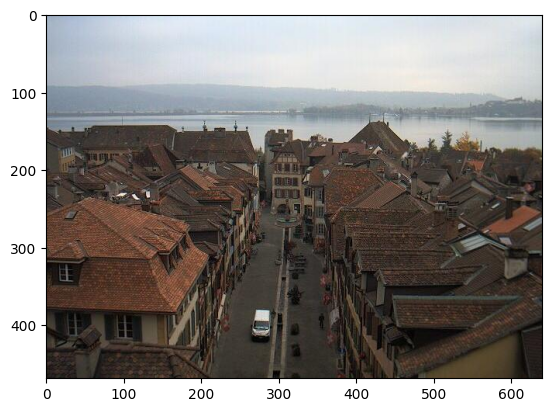

In [652]:
random_img_viz(train_img)

**Langkah 3 - Pra Pengolahan Data**

In [653]:
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

In [654]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

In [655]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

In [656]:
train_std_img_list = preprocess(train_img)

In [657]:
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 81
(600, 1100, 3)


**Langkah 4 - Ekstraksi Fitur**

In [658]:
# Get feature based on average brightness using HSV colorspace
def avg_brightness(image):
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2]) # take the 3rb value which is the V channel
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area

    return avg

Image 166
Avg Brighness: 25.7319


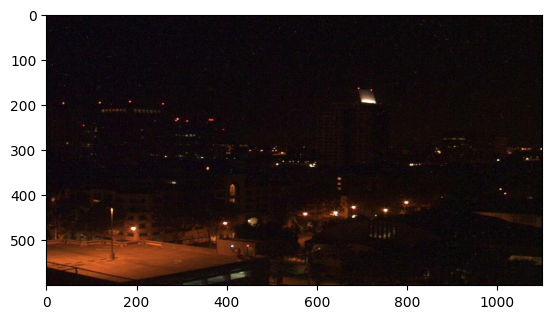

In [659]:
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Avg Brighness: {avg_img:.4f}')
plt.imshow(feature_img)

**Langkah 5 - Klasifikasi dengan Metode Treshold**

In [660]:
def predict_label(img, threshold):
    # Computer average brightness
    avg = avg_brightness(img)
    pred = 0

    # Predict the label based on user defined threshold
    if avg > threshold:
        pred = 1

    return pred

Image 129
Actual label: 0
Predicted label: 0


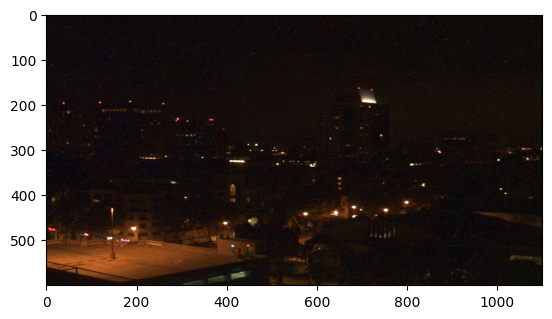

In [661]:
# Test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

# Evaluate
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

**Langkah 6 - Evaluasi Manual**

In [662]:
def evaluate(img_list, threshold):
    miss_labels = []

    for file in img_list:
        # Get the ground truth / correct label
        img = file[0]
        label = file[1]

        # Get prediction
        pred_label = predict_label(img, threshold)

        # Compare ground truth and pred
        if pred_label != label:
            miss_labels.append((img, pred_label, label))

    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img

    print(f'Accuracy: {accuracy:.4f}')

In [663]:
# Evaluate on train data
evaluate(train_std_img_list, threshold=120)

Accuracy: 0.8417


In [664]:
# Evaluate on test data

# Load test data
test_img = load_dataset(test_dir)

# Preprocess
test_std_img_list = preprocess(test_img)

# Predict
evaluate(test_std_img_list, threshold=120)

Accuracy: 0.8688


**Klasifikasi dengan SVM**

Sebelumnya, kita hanya menggunakan threshold sebagai acuan. Cara ini mungkin tidak efektif dikarenakan kita harus menentukan threshold dengan tepat. Oleh karena itu, selanjutnya kita akan mencoba menggunakan model SVM untuk proses klasifikasi. Seluruh langkah yang digunakan serupa, kita hanya mengubah mulai langkah ke-4.

**Langkah 4 Alternatif - Membuat Feature Vectors**

In [665]:
# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []

    for img in img_list:
        img_avg = avg_brightness(img[0]) # Get the avg brightness from image
        img_label = img[1] # Get the image label

        avg_list.append(img_avg)
        labels.append(img_label)

    # Stack data in columcular way
    data = np.column_stack((avg_list, labels))
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    return df

In [666]:
# Extract feature on train data
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

Shape: (240, 2)


,AVG_BRIGHT,LABELS
0,104.673233,1.0
1,130.889859,1.0
2,136.946642,1.0
3,106.673115,1.0
4,112.948195,1.0


In [667]:
# Do the same thing on test data
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')
test_avg_img.head()

Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,141.376232,1.0
1,140.618388,1.0
2,140.594911,1.0
3,144.243461,1.0
4,134.486027,1.0


**Langkah 5 - Buat Model SVM**

In [668]:
# import requied library
from sklearn.svm import SVC

# Split data and label
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)
y_train = train_avg_img.iloc[:,1]
X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)
y_test = test_avg_img.iloc[:,1]

model = SVC()
model.fit(X_train, y_train)

SVC()

**Langkah 6 - Evaluasi**

In [669]:
from sklearn.metrics import accuracy_score

# Make a prediction on train data
y_train_pred = model.predict(X_train)

# Get the accuracy on train data
acc_train = accuracy_score(y_train, y_train_pred)

# Make a prediction on test data
y_test_pred = model.predict(X_test)

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)

# Print Eval Result
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 0.8583333333333333
Accuracy on test: 0.9


**Tugas Praktikum**

**Langkah 1 - Import Library dan Load Data**

In [673]:
from google.colab import files
uploaded = files.upload()

Saving voice (1).csv to voice (1).csv


In [675]:
import pandas as pd
df = pd.read_csv('voice (1).csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


**Langkah 2 - Preprocessing**

In [677]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Cek info dataset
print(df.info())

# Ubah label 'label' jadi angka (misal: male=0, female=1)
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

# Pisahkan fitur (X) dan target (y)
X = df.drop('label', axis=1)
y = df['label']

# Normalisasi data agar skala fitur seimbang
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data siap digunakan")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   int6

**Langkah 3 - Splut Data dan Buat Model SVM**

In [678]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# --- Split 70:30 ---
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Model SVM Linear
svm_linear_70 = SVC(kernel='linear')
svm_linear_70.fit(X_train_70, y_train_70)
y_pred_70 = svm_linear_70.predict(X_test_30)
acc_linear_70 = accuracy_score(y_test_30, y_pred_70)

# --- Split 80:20 ---
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

svm_linear_80 = SVC(kernel='linear')
svm_linear_80.fit(X_train_80, y_train_80)
y_pred_80 = svm_linear_80.predict(X_test_20)
acc_linear_80 = accuracy_score(y_test_20, y_pred_80)

print(f"Akurasi Linear Kernel 70:30: {acc_linear_70:.4f}")
print(f"Akurasi Linear Kernel 80:20: {acc_linear_80:.4f}")

Akurasi Linear Kernel 70:30: 0.9706
Akurasi Linear Kernel 80:20: 0.9763


**Langkah 4 - Model SVM dengan Kernel Polynomial**

In [679]:
# --- Kernel Polynomial (70:30) ---
svm_poly_70 = SVC(kernel='poly', degree=3)
svm_poly_70.fit(X_train_70, y_train_70)
y_pred_poly_70 = svm_poly_70.predict(X_test_30)
acc_poly_70 = accuracy_score(y_test_30, y_pred_poly_70)

# --- Kernel Polynomial (80:20) ---
svm_poly_80 = SVC(kernel='poly', degree=3)
svm_poly_80.fit(X_train_80, y_train_80)
y_pred_poly_80 = svm_poly_80.predict(X_test_20)
acc_poly_80 = accuracy_score(y_test_20, y_pred_poly_80)

print(f"Akurasi Polynomial Kernel 70:30: {acc_poly_70:.4f}")
print(f"Akurasi Polynomial Kernel 80:20: {acc_poly_80:.4f}")


Akurasi Polynomial Kernel 70:30: 0.9569
Akurasi Polynomial Kernel 80:20: 0.9685


**Langkah 5 - Model SVMdengan Kernel RBF**

In [680]:
# --- Kernel RBF (70:30) ---
svm_rbf_70 = SVC(kernel='rbf', gamma='scale', C=1)
svm_rbf_70.fit(X_train_70, y_train_70)
y_pred_rbf_70 = svm_rbf_70.predict(X_test_30)
acc_rbf_70 = accuracy_score(y_test_30, y_pred_rbf_70)

# --- Kernel RBF (80:20) ---
svm_rbf_80 = SVC(kernel='rbf', gamma='scale', C=1)
svm_rbf_80.fit(X_train_80, y_train_80)
y_pred_rbf_80 = svm_rbf_80.predict(X_test_20)
acc_rbf_80 = accuracy_score(y_test_20, y_pred_rbf_80)

print(f"Akurasi RBF Kernel 70:30: {acc_rbf_70:.4f}")
print(f"Akurasi RBF Kernel 80:20: {acc_rbf_80:.4f}")

Akurasi RBF Kernel 70:30: 0.9811
Akurasi RBF Kernel 80:20: 0.9826


**Langkah 6 - Tabel Perbandingan Akurasi**

In [681]:
# Buat tabel hasil akurasi
data_acc = {
    'Kernel': ['Linear', 'Polynomial', 'RBF'],
    'Akurasi 70:30': [acc_linear_70, acc_poly_70, acc_rbf_70],
    'Akurasi 80:20': [acc_linear_80, acc_poly_80, acc_rbf_80]
}

df_acc = pd.DataFrame(data_acc)
print(df_acc)

       Kernel  Akurasi 70:30  Akurasi 80:20
0      Linear       0.970557       0.976341
1  Polynomial       0.956887       0.968454
2         RBF       0.981073       0.982650


In [686]:
day_path = '/content/drive/MyDrive/ML/images/images/test/day/'
night_path = '/content/drive/MyDrive/ML/images/images/test/night/'

In [687]:
import cv2
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Path baru (folder test)
day_path = '/content/drive/MyDrive/ML/images/images/test/day/'
night_path = '/content/drive/MyDrive/ML/images/images/test/night/'

X, y = [], []
valid_ext = ('.jpg', '.jpeg', '.png', '.JPG', '.PNG')

# Ambil histogram dari gambar siang
for file in os.listdir(day_path):
    if file.endswith(valid_ext):
        img = cv2.imread(os.path.join(day_path, file))
        if img is not None:
            hist = cv2.calcHist([img], [0, 1, 2], None, [8,8,8], [0,256,0,256,0,256])
            X.append(hist.flatten())
            y.append(0)  # label siang

# Ambil histogram dari gambar malam
for file in os.listdir(night_path):
    if file.endswith(valid_ext):
        img = cv2.imread(os.path.join(night_path, file))
        if img is not None:
            hist = cv2.calcHist([img], [0, 1, 2], None, [8,8,8], [0,256,0,256,0,256])
            X.append(hist.flatten())
            y.append(1)  # label malam

print(f"Total gambar terbaca: {len(X)}")

# Split data 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat model SVM RBF
svm_rbf = SVC(kernel='rbf', C=10, gamma=0.01)
svm_rbf.fit(X_train, y_train)
y_pred = svm_rbf.predict(X_test)
acc_hist = accuracy_score(y_test, y_pred)

print(f"Akurasi klasifikasi Siang/Malam (RBF Histogram): {acc_hist:.4f}")

Total gambar terbaca: 139
Akurasi klasifikasi Siang/Malam (RBF Histogram): 0.6071
